In [12]:
# GRABIM TEST
%load_ext autoreload
%autoreload 2
import numpy as np

import GRABIM as GRABIM


# Plot (external libraries)
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Legend, LegendItem
from bokeh.models import Arrow, NormalHead
from bokeh.models import ColumnDataSource, LabelSet, Text
output_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [13]:
# Problem input
f1 = 400e6; # [Hz] Start frequency
f2 = 1000e6; # [Hz] End frequency
m = 10; # Number of frequency samples
freq = np.linspace(f1, f2, m);

ZS = [20-10j, 20-20j, 20-10j, 25-5j, 30+10j, 25-10j, 30-10j, 20-10j, 20-30j, 30-20j]; # [Ohm] Source impedance
ZL = [120+30j, 120+30j, 115+20j, 100+30j, 120+50j, 100, 120+30j, 120+30j, 100+30j, 100+20j]; # [Ohm] Load impedance

In [14]:
# GRID SEARCH
code = ['CS', 'LP', 'CS', 'LP', 'CS', 'LP'];
[v_best, RL] = GRABIM.GridSearch(ZS, ZL, freq, m, code, 1, delta_X=0.25)
print(v_best)
print("RLmax = ", "{:.2f}".format(RL), 'dB')

GRABIM.Plot_S21_S11_dB(ZS, ZL, code, v_best, freq)

[2.96613177e-11 1.17888879e-08 5.15436414e-12 1.71527307e-08
 3.54253921e-12 6.78403658e-08]
RLmax =  11.21 dB


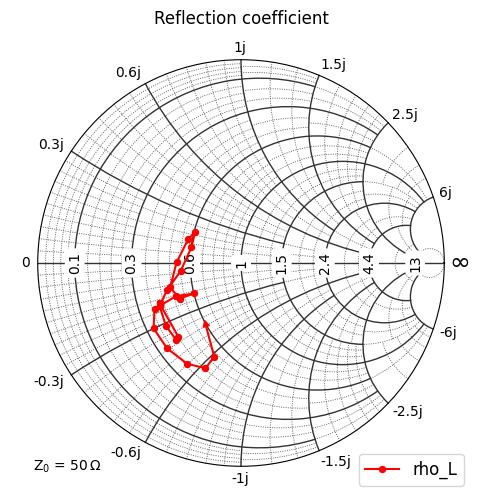

In [15]:
# Plot Smith Chart
from matplotlib import pyplot as pp
from smithplot import SmithAxes
%matplotlib notebook
%matplotlib inline
# plot data
pp.figure(figsize=(6, 6))

ax = pp.subplot(1, 1, 1, projection='smith')
pp.plot([10, 100], markevery=1)

Z0 = 50*np.ones(len(ZS));
rhoS = (ZS - Z0)/(ZS+Z0);
rhoL = (ZL - Z0)/(ZL+Z0);
pp.plot(rhoS, 'r', markevery=1, label="rho_L", equipoints=22, datatype=SmithAxes.S_PARAMETER)

leg = pp.legend(loc="lower right", fontsize=12)
pp.title("Reflection coefficient")

pp.show()